Statistica Elementare con Numpy
===============================

<img src="../Humour/extrapolating1.png" width="500" align="center"/>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Dati in un array numpy.

In [4]:
dati = np.array([1.95,1.96,1.9,1.9,1.84,1.81,2.06,1.99,1.93,1.97,2.02,1.92,1.95,1.88,1.87,2.03,1.85,2.08,1.96,1.81,
                2.07,1.91,1.79,1.99,1.97,1.95,1.96,1.93,1.83,2.09,2.02,2.09,1.84,1.86,1.96,2.03,1.93,1.9,1.94,1.87,
                1.97,1.91,1.87,1.81,2.06,2.02,1.96,1.81,1.93,2.03,1.92,1.96,1.8,1.95,1.9,2.02,2.03,1.9,2.03,2.02,
                1.96,1.9,1.98,1.87,1.9,1.89,1.84,2.06,1.93,2.06,1.93,1.93,1.9,1.9,1.9,1.93,1.86,1.83,1.96,1.81,2.03,
                1.98,1.84,1.86,1.96,1.81,1.98,1.84,1.86,1.96,1.92,1.96,1.85,2.04,2,1.92,1.9,2.15,1.94,1.92])

In [5]:
num_elementi = dati.size
num_elementi

100

Dati al quadrato

In [6]:
dati_sq = dati*dati

Media utilizzando solo la funzione sum

In [7]:
media1 = dati.sum()/num_elementi
media1

1.9357

Media utilizzando la funzione mean di numpy

In [8]:
media2 = dati.mean()
media2

1.9357

Varianza calcolata espicitamente

In [9]:
varianza1 = (dati_sq - 2.*media1*dati + media1*media1).sum()/num_elementi # Notice array + const*array + const
varianza1

0.006002510000000254

Varianza empirica

In [10]:
varianzaEmp = (dati_sq - 2.*media1*dati + media1*media1).sum()/(num_elementi-1)
varianzaEmp

0.006063141414141671

In [11]:
varianzaEmp1 = (dati_sq - media1*media1).sum()/(num_elementi-1) 
varianzaEmp1

0.006063141414141186

Varianza calcolata usando la funzione var di numpy (divide per N).

In [12]:
varianza2 = dati.var()
varianza2

0.006002509999999994

Deviazione standard calcolata dalla varianza e usando la funzione std di numpy

In [13]:
deviazione_std1 = np.sqrt(varianza2)
deviazione_std1

0.07747586721037715

In [14]:
deviazione_std2 = dati.std()
deviazione_std2

0.07747586721037715

Selezione dei dati a meno di 3*sigma da media1

In [15]:
dati1 = np.array([n for n in dati if np.absolute(n - media1) < 3.*deviazione_std1])

In [16]:
dati1.size

100

Nessun dato viene scartato. Test: vediamo quanti dati sono compresi in un intervallo di +/- sigma

In [17]:
dati1 = np.array([n for n in dati if np.absolute(n - media1) < deviazione_std1])

In [18]:
dati1.size

62

Istogramma delle frequenze

In [19]:
min = dati.min()
min

1.79

In [20]:
max = dati.max()
max

2.15

In [21]:
nbins = 10
xrange = (1.75,2.20)

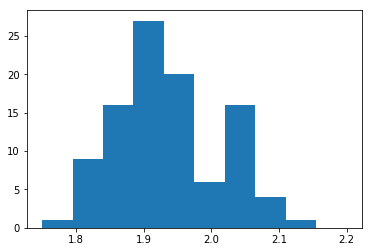

In [22]:
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(dati, nbins, range=xrange)

In [23]:
nevent       # Numero di eventi in ciacun bin

array([ 1.,  9., 16., 27., 20.,  6., 16.,  4.,  1.,  0.])

In [24]:
bins         # Estremi dei bin

array([1.75 , 1.795, 1.84 , 1.885, 1.93 , 1.975, 2.02 , 2.065, 2.11 ,
       2.155, 2.2  ])

I patches sono i rettangoli (blu in questo caso) che vengono usati per disegnare l'istogramma.

<img src="../Humour/NormalDistribution.jpg" width="400" align="left"/>

Distribuzione gaussiana casuale con stessa media e deviazione standard di quella osservata. Istogramma delle frequenze.

In [26]:
gaussdati = media1 + deviazione_std1*np.random.randn(100)

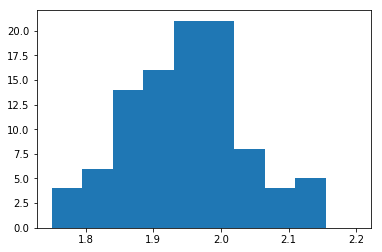

In [27]:
fig1, ax1 = plt.subplots()
n1, bins1, patches1 = ax1.hist(gaussdati, nbins, range=xrange)

In [28]:
def ek(xval,ave,stdev):
    return np.exp(-((xval-ave)/stdev)**2/2.0)/stdev/np.sqrt(2.0*np.pi)

In [29]:
halfBinWidth = (bins[1]-bins[0])/2.

Dall'array bins che contiene gli estremi dei bin costruiamo l'array dei punti medi dei bin (bins + halfBinWidth), eliminando l'ultimo elemento (np.delete(   ,-1)).

In [30]:
points = np.delete(bins + halfBinWidth,-1)
points

array([1.7725, 1.8175, 1.8625, 1.9075, 1.9525, 1.9975, 2.0425, 2.0875,
       2.1325, 2.1775])

Test that the approximate integral of ek is equal to one.

In [31]:
ek(points,media1,deviazione_std1).sum()*halfBinWidth*2.

0.9922002795437356

In [32]:
ekval = ek(points,media1,deviazione_std1)*halfBinWidth*2.*num_elementi

Frequenze osservate vs frequenze attese

In [33]:
print("frequenze osservate",nevent)
print("frequenze attese   ",ekval)

frequenze osservate [ 1.  9. 16. 27. 20.  6. 16.  4.  1.  0.]
frequenze attese    [ 2.52019368  7.23654943 14.82914293 21.68640045 22.63319153 16.85741691
  8.96031259  3.39892982  0.92012777  0.17776284]


In [34]:
chisq = ((ekval-nevent)**2/ekval).sum()
chisq

15.862163073181813

<img src="../Humour/extrapolating2.png" width="850" align="left"/>

Numeri Casuali
---------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt         # plotting of results

help(np.random.normal)

- Come generare numeri distribuiti secondo la distribuzione normale standard $\mu = 0.0,\, \sigma = 1.0\,$. 

In [14]:
m1 = np.random.normal(size=2000)

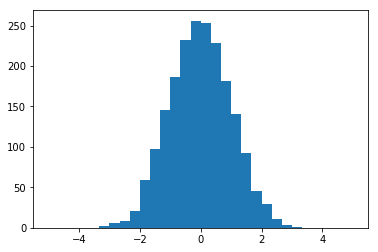

In [15]:
nbins = 30
xrange = (-5,5)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m1, nbins, range=xrange)

- Come generare numeri distribuiti secondo la distribuzione normale con $\mu = -2.0,\, \sigma = 0.3\,$. 

In [14]:
m2 = np.random.normal(loc=-2., scale=0.3, size=2000)

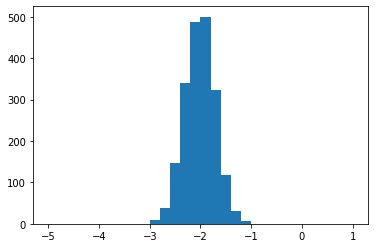

In [16]:
nbins = 30
xrange = (-5,1)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m2, nbins, range=xrange)

- Come generare numeri distribuiti secondo la distribuzione uniforme standard $[0,1]$. 

In [ ]:
help(np.random)

In [6]:
m3 = np.random.random_sample(size=2000)

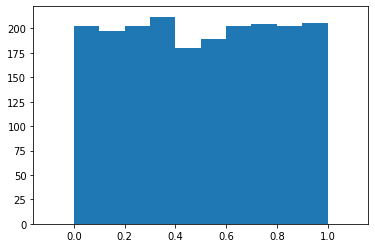

In [9]:
nbins = 12
xrange = (-0.1,1.1)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m3, nbins, range=xrange)

In [ ]:
help(np.random.random_integers)

In [21]:
m4 = np.random.random_integers(0,high=100,size=20)
m4

/Users/maina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  """Entry point for launching an IPython kernel.


array([ 1, 46, 16, 78, 94, 56, 61, 78, 84,  2, 58, 88,  8, 53, 48, 24, 24,
       73, 84, 97])

In [22]:
m4 = np.random.randint(0,101,size=20)
m4

array([ 1, 62, 65, 62, 38, 23, 31, 82, 41, 86, 90, 33, 55, 27, 86, 12, 56,
       61, 91, 31])

    Compatibility functions
    =============================================================================
    rand                 Uniformly distributed values.
    randn                Normally distributed values.
    ranf                 Uniformly distributed floating point numbers.
    randint              Uniformly distributed integers in a given range.
    =============================================================================
    